In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, mean_squared_error,log_loss
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm_notebook as TN
from sklearn.datasets import make_blobs,make_moons
import matplotlib.colors

In [0]:
data, label=make_blobs(n_samples=2000, n_features=2, centers=6, random_state=0)

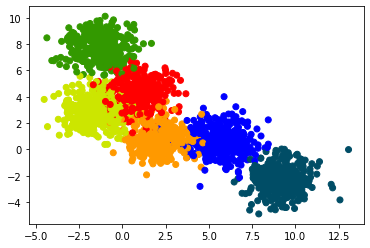

In [13]:
my_map=matplotlib.colors.LinearSegmentedColormap.from_list(" ",['red','yellow','green','blue'])
plt.scatter(data[:,0],data[:,1],c=label,cmap=my_map)
plt.show()

In [14]:
print(label)


[5 5 4 ... 1 2 2]


In [0]:
label_bin=[i%2 for i in label]

In [16]:
label_bin

[1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,


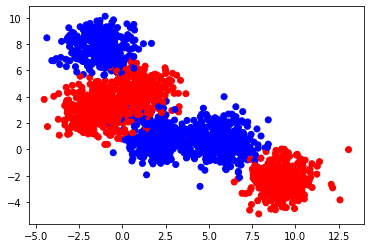

In [17]:
plt.scatter(data[:,0],data[:,1],c=label_bin,cmap=my_map)
plt.show()

In [0]:
x_train,x_test, y_train, y_test=train_test_split(data, label_bin, stratify=label_bin, train_size=.8, random_state=0)

In [20]:
y_train=np.array(y_train)
y_test=np.array(y_test)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(1600, 2) (1600,) (400, 2) (400,)


#DNN_Class

In [0]:
class FeedForwardOne:
  def __init__(self):
    #layer 1
    self.w111=np.random.randn()
    self.w112=np.random.randn()
    self.w121=np.random.randn()
    self.w122=np.random.randn()
    self.b11=0
    self.b12=0
    #layer2
    self.w211=np.random.randn()
    self.w212=np.random.randn()
    self.w221=np.random.randn()
    self.w222=np.random.randn()
    self.b21=0
    self.b22=0
    #layer3
    self.w311=np.random.randn()
    self.w312=np.random.randn()
    self.b3=0
  
  def sigmoid(self,x):
    return(1.0/(1.0+np.exp(-x)))

  def feed_forward(self, x):
    self.x1,self.x2=x
    
    #layer 1
    self.a11=self.w111*self.x1 + self.w112*self.x2+self.b11
    self.h11=self.sigmoid(self.a11)

    self.a12=self.w121*self.x1+self.w122*self.x2+self.b12
    self.h12=self.sigmoid(self.a12)
    #layer2
    self.a21=self.h11*self.w211+self.h12*self.w212+self.b21
    self.h21=self.sigmoid(self.a21)

    self.a22=self.w221*self.h11+self.w222*self.h12+self.b22
    self.h22=self.sigmoid(self.a22)
    #layer3
    self.a3=self.w311*self.h21+self.w312*self.h22+self.b3
    self.h3=self.sigmoid(self.a3)
    return self.h3
  
  def grad_calc(self, x, y):
    self.feed_forward(x)
    #self.dloss=(self.h3-y)
    
    # self.dh3a=self.h3(1-self.h3)
    
    # self.dw311=self.dloss*self.dh3a*self.h21
    # self.dw312=self.dloss*self.dh3a*self.h22
    # self.db3=self.dloss*self.dh3a
    
    # self.da21=self.h21(1-self.h21)
    # self.da22=self.h22(1-self.h22)

    # self.dw211=self.dloss*self.dh3a*self.w311* self.da21 * self.h11
    # self.dw221=self.dloss*self.dh3a*self.w312*self.da22* self.h11
    # self.dw212=self.dloss*self.dh3a*self.w311* self.da21 * self.h12
    # self.dw222=self.dloss*self.dh3a*self.w311* self.da21 * self.h12
    # self.db21=self.dloss*self.dh3a*self.w311* self.da21
    # self.db22=self.dloss*self.dh3a*self.w311* self.da21

    # self.dw211=self.dloss*self.dh3a*self.w311* self.da21 * self.h11
    # self.dw221=self.dloss*self.dh3a*self.w312*self.da22* self.h11
    # self.dw212=self.dloss*self.dh3a*self.w311* self.da21 * self.h12
    # self.dw222=self.dloss*self.dh3a*self.w311* self.da21 * self.h12
    # self.db21=self.dloss*self.dh3a*self.w311* self.da21
    # self.db22=self.dloss*self.dh3a*self.w311* self.da21
    # self.da1=self.h1(1-self.h1)*(self*w211*self.w + )
    self.dloss=self.h3-y
    self.dh3=self.h3*(1-self.h3)
    #layer 3
    self.dw311=self.dloss*self.dh3*self.h21
    self.dw312=self.dloss*self.dh3*self.h22
    self.db3=self.dloss*self.dh3
    #layer 2
    self.dh21=self.dloss*self.dh3*self.h21*(1-self.h21)
    self.dh22=self.dloss*self.dh3*self.h22*(1-self.h22)

    self.dw211=self.dh21*self.h11
    self.dw212=self.dh21*self.h12
    self.db21=self.dh21

    self.dw221=self.dh22*self.h11
    self.dw222=self.dh22*self.h12
    self.db22=self.dh22

    #layer 3
    self.dh11=self.w211*self.dh21+self.w221*self.dh22
    self.dh12=self.w212*self.dh21+self.w222*self.dh22

    self.dw111=self.x1*self.dh11
    self.dw112=self.x2*self.dh11
    self.db11=self.dh11

    self.dw121=self.x1*self.dh12
    self.dw122=self.x2*self.dh12
    self.db12=self.dh12
  def predict(self, X):
    y_p=[]
    for x in X:
      pred=self.feed_forward(x)
      y_p.append(pred)
    return np.array(y_p)
  def fit(self,X,Y, epochs=1, initialize=True, learning_rate=1, display_loss=True):
    if(initialize):
      self.w111=np.random.randn()
      self.w112=np.random.randn()
      self.w121=np.random.randn()
      self.w122=np.random.randn()
      self.b11=0
      self.b12=0
      #layer2
      self.w211=np.random.randn()
      self.w212=np.random.randn()
      self.w221=np.random.randn()
      self.w222=np.random.randn()
      self.b21=0
      self.b22=0
      #layer3
      self.w311=np.random.randn()
      self.w312=np.random.randn()
      self.b3=0      
    if(display_loss):
      loss={}
    for epoch in TN(range(epochs), total=epochs, unit="Epochs"):
      dw111,dw112,dw121,dw122,db11,db12=[0]*6
      dw211,dw212,dw221,dw222,db21,db22=[0]*6
      dw311,dw312, db3=[0]*3
      for x,y in zip(X,Y):
        self.grad_calc(x,y)
        dw111+=self.dw111
        dw112+=self.dw112
        dw121+=self.dw121
        dw122+=self.dw122
        db11+=self.db11
        db12+=self.db12

        dw211+=self.dw211
        dw212+=self.dw212
        dw221+=self.dw221
        dw222+=self.dw222
        db21+=self.db21
        db22+=self.db22
        
        dw311+=self.dw311
        dw312+=self.dw312
        db3+=self.db3
      
      m=X.shape[1]
      self.w111-=learning_rate*dw111/m
      self.w112-=learning_rate*dw112/m
      self.w121-=learning_rate*dw121/m
      self.w122-=learning_rate*dw122/m
      self.b12-=learning_rate*db12/m
      self.b11-=learning_rate*db11/m

      self.w211-=learning_rate*dw211/m
      self.w212-=learning_rate*dw212/m
      self.w221-=learning_rate*dw221/m
      self.w222-=learning_rate*dw222/m
      self.b22-=learning_rate*db22/m
      self.b21-=learning_rate*db21/m
      
      self.w311-=learning_rate*dw311/m
      self.w312-=learning_rate*dw312/m
      self.b3-=learning_rate*db3/m
      if(display_loss):
        y_p=self.predict(X)
        loss[epoch]=mean_squared_error(y_p,Y)
    if(display_loss):
      plt.plot(list(loss.values()))
      plt.xlabel("EPOCHS")
      plt.ylabel("MSE")
      plt.show()
  
        

In [0]:
ffn1=FeedForwardOne()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:128: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


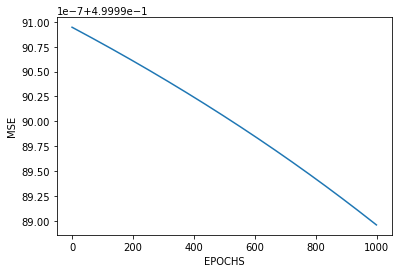

In [44]:
ffn1.fit(x_train,y_train, epochs=1000, learning_rate=0.5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:128: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


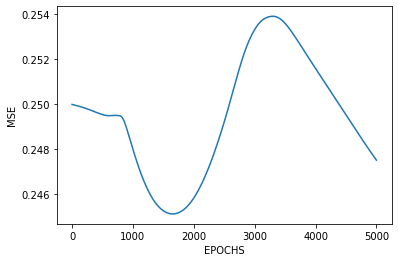

In [46]:
ffn1.fit(x_train,y_train, epochs=5000, initialize=True,learning_rate=0.0001)
